In [30]:
# Section a: Import necessary packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical



In [31]:
# Load MNIST dataset
# mnist_dataset = tf.keras.datasets.mnist
# (X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()

mnist_dataset = np.load('mnist.npz')
x_train = mnist_dataset['x_train']
y_train = mnist_dataset['y_train']
x_test = mnist_dataset['x_test']
y_test = mnist_dataset['y_test']


# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)



Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [32]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten input layer for 28x28 images
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Another hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 classes) and softmax activation
])

# Compile the model
model.compile(metrics=['accuracy'], loss='categorical_crossentropy',optimizer=SGD())
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [33]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.6661 - accuracy: 0.8190 - val_loss: 0.3151 - val_accuracy: 0.9113
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2885 - accuracy: 0.9182 - val_loss: 0.2492 - val_accuracy: 0.9300
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2353 - accuracy: 0.9327 - val_loss: 0.2134 - val_accuracy: 0.9385
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2026 - accuracy: 0.9418 - val_loss: 0.1904 - val_accuracy: 0.9451
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1778 - accuracy: 0.9494 - val_loss: 0.1681 - val_accuracy: 0.9496
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1591 - accuracy: 0.9548 - val_loss: 0.1546 - val_accuracy: 0.9535
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1439 - accuracy: 0.9587 - val_loss: 0.1411 - val_ac

In [34]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 [==============================] - 2s 6ms/step - loss: 0.1177 - accuracy: 0.9637
Test loss: 0.1177
Test accuracy: 0.9637


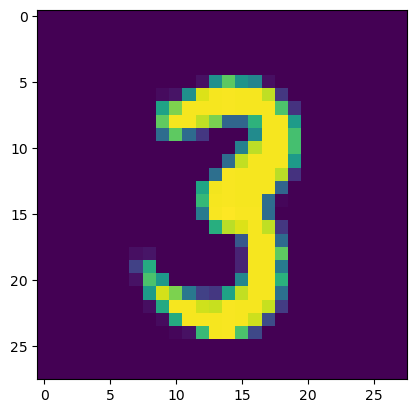

313/313 [==============================] - 2s 5ms/step
Handwritten number in the image is= 3


In [35]:
import random
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()


predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

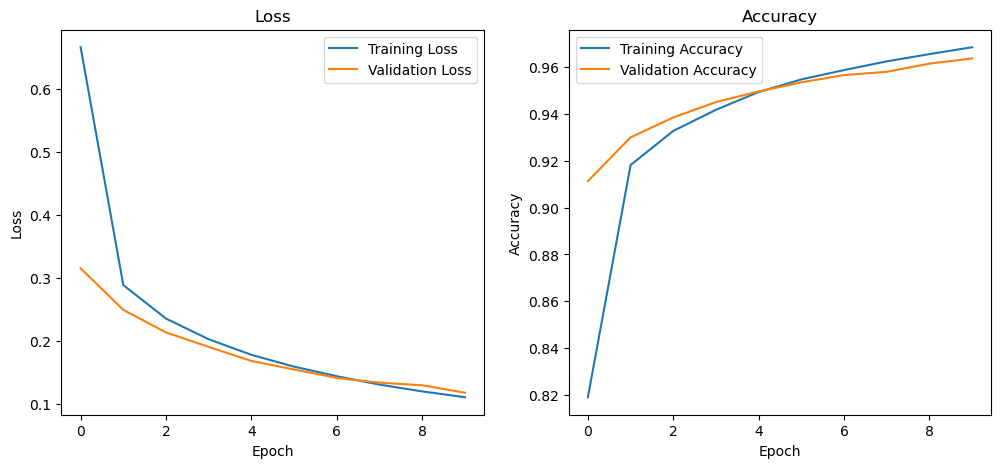

In [36]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
